# HW 1: Basic Bayesian Decisions
Please complete this jupyter notebook and upload the saved notebook and a pdf of the notebook to the MyCourses dropbox. Do not copy/past information from online.

## Make sure to run the below code

In [1]:
# for inline plots in jupyter
%matplotlib inline
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# Question 1: util.py Testing

In [2]:
import numpy as np
import util

num1 = np.random.normal(0, 1, 50)
cmean = util.mean(num1)
npmean = np.mean(num1)
print(f"Custom mean: {cmean}, Numpy mean: {npmean}")
cstdev = util.stdev(num1, mu=cmean) 
npstdev = np.std(num1)
print(f"Custom stdev: {cstdev}, Numpy stdev: {npstdev}")

num2 = np.random.normal(0, 1, (50, 3))
csmean = util.sampleMean(num2)
npsmean = np.mean(num2, axis=0)
print(f"Custom sample mean: {csmean}")
print(f"Numpy sample mean: {npsmean}")
ccov = util.covariance(num2)
npcov = np.cov(num2.T)
print(f"Custom covariance:\n{ccov}")
print(f"Numpy covariance:\n{npcov}")

Custom mean: -0.04657926985444136, Numpy mean: -0.04657926985444136
Custom stdev: 0.9295342567543539, Numpy stdev: 0.9295342567543539
Custom sample mean: [0.3634349257338805, 0.02466601651625409, -0.11435244774444664]
Numpy sample mean: [ 0.36343493  0.02466602 -0.11435245]
Custom covariance:
[[1.3902515684704637, -0.1289527968057835, -0.306136366255001], [-0.1289527968057835, 0.9887627800264005, 0.005769915352411499], [-0.306136366255001, 0.005769915352411499, 1.3522766853737354]]
Numpy covariance:
[[ 1.41862405 -0.13158449 -0.31238405]
 [-0.13158449  1.00894161  0.00588767]
 [-0.31238405  0.00588767  1.37987417]]


# Question 2: A part of testing in Question 1

Please complete the cells below. Only code between comments that say "Your Code Here". The remaining cells should be ran, but you do not need to change anything

## You may need to run the first cell to install the required python libraries.

In [3]:
# Optional cell to run
import sys
!{sys.executable} -m pip install numpy pandas matplotlib 

''' Importing sys and running sys.executable ensures that you are 
    installing the libraries with this specific python kernel '''


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\T440\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


' Importing sys and running sys.executable ensures that you are \n    installing the libraries with this specific python kernel '

In [4]:
'''Importing Required Libraries'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Set figure parameters
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 

In [5]:
'''We can sample from a normal distribution using np.random.normal'''
mu, sigma = 60, 5 # mean and standard deviation
resting_hr = np.random.normal(mu, sigma, 1000)

mu, sigma = 100, 5 # mean and standard deviation
stress_hr = np.random.normal(mu, sigma, 1000)

print("Resting Heart-Rate length is:", len(resting_hr), " or using shape method: ", resting_hr.shape[0])

Resting Heart-Rate length is: 1000  or using shape method:  1000


(array([  2.,   8.,  19.,  39.,  59.,  85., 130., 121., 140., 134., 106.,
         83.,  37.,  20.,   6.,   7.,   3.,   0.,   0.,   1.]),
 array([ 84.75719036,  86.59600827,  88.43482619,  90.2736441 ,
         92.11246201,  93.95127993,  95.79009784,  97.62891576,
         99.46773367, 101.30655159, 103.1453695 , 104.98418742,
        106.82300533, 108.66182324, 110.50064116, 112.33945907,
        114.17827699, 116.0170949 , 117.85591282, 119.69473073,
        121.53354864]),
 <BarContainer object of 20 artists>)

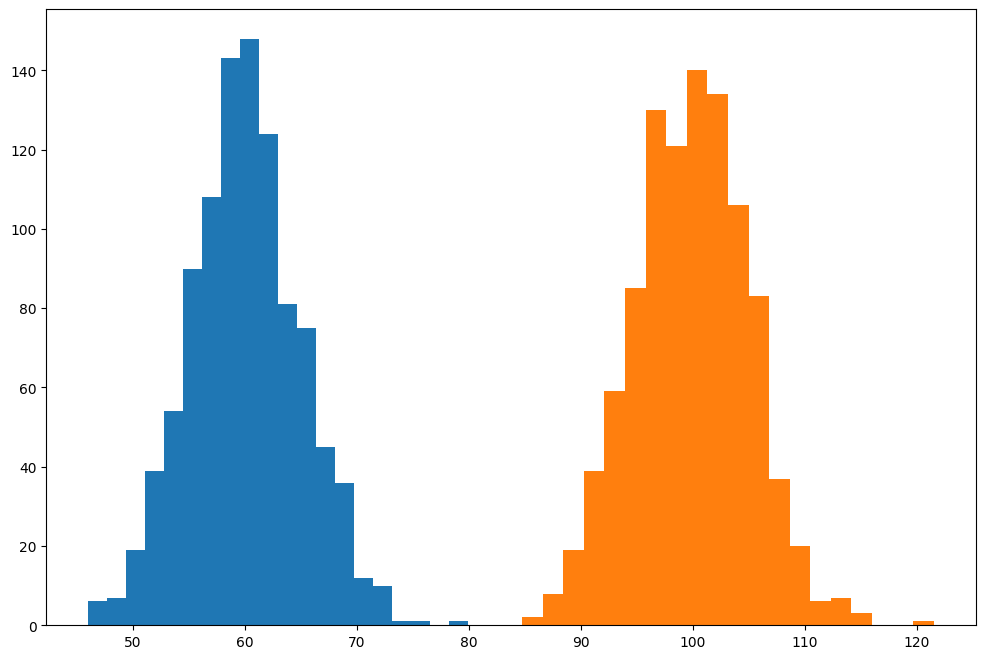

In [6]:
''' We can plot histograms using the following lines'''
n_bins = 20 # histogram parameter
plt.hist(resting_hr, n_bins)
plt.hist(stress_hr, n_bins)

## Now lets code some simple functions. Do not use any libraries (e.g., np.mean) for your code. You may use len and np.shape methods.

Here are some helpful equations:

### How to calculate mean

$ \hat{\mu} = \frac{\Sigma_{i=1}^{N} x_i}{N} $


### How to calculate standard deviation

$ \hat{\sigma} = \frac{\sqrt{\Sigma_{i=1}^{N} (x_i - \hat{\mu})^2 }}{\sqrt{N}} $


In [7]:
def calculate_mean(np_array):
    '''Your code here'''
    m = 0
    for i in np_array:
        m += i
    ans = m/len(np_array)
    '''Stop coding here'''    
    return ans

print("Actual mean: 60, Calculated mean: ", calculate_mean(resting_hr))

def calculate_std(np_array, mu):
    '''Your code here'''
    sd = 0
    for i in np_array:
        sd += (i-mu)**2
    ans = (sd/len(np_array))**0.5
    '''Stop coding here'''    
    return ans

print("Actual std: 5, Calculated std: ", calculate_std(resting_hr, calculate_mean(resting_hr)))

Actual mean: 60, Calculated mean:  60.081056307573206
Actual std: 5, Calculated std:  4.933771831364717


# Question 3: Calculating Priors (Part of Question 2 in pdf)

Now we are going to get a little more tricky with calculating priors with class labels. We are going to create a Classifier Prototype class and a Priors class that inherits from Classifier. We are also going to use a dictionary to keep track of our model parameters.

In [8]:
'''Create our dataset with labels'''
mu, sigma = 60, 5 # mean and standard deviation
resting_hr = np.random.normal(mu, sigma, 1000)

mu, sigma = 100, 5 # mean and standard deviation
stress_hr = np.random.normal(mu, sigma, 1100)

''' Create a Pandas Dataframe with our X data'''
hrDf = pd.DataFrame(np.hstack((resting_hr, stress_hr)), columns=['Heart Rate'])

''' Create a List with labels for each sample '''
li = ['Not Stressed' for x in range(0,1000)]
li.extend(['Stressed' for x in range(0,1100)]) # .extend is an inplace method that adds each item in a list to a list

''' Create a new column (labels) and set that equal to the list'''
hrDf['Labels'] = li

''' Display our dataset'''
display(hrDf)

,Heart Rate,Labels
0,67.299820,Not Stressed
1,58.833065,Not Stressed
2,61.989551,Not Stressed
3,63.939765,Not Stressed
4,62.080370,Not Stressed
...,...,...
2095,97.340833,Stressed
2096,92.939734,Stressed
2097,103.181641,Stressed
2098,108.005536,Stressed


dict_keys(['Not Stressed', 'Stressed'])

1100

Heart Rate                                                        \
                  count       mean       std        min        25%        50%   
Labels                                                                          
Not Stressed     1000.0  60.152871  4.814242  42.843159  57.084856  60.147700   
Stressed         1100.0  99.848399  5.034872  81.974946  96.617480  99.684022   

                                      
                     75%         max  
Labels                                
Not Stressed   63.187287   79.183225  
Stressed      103.360339  115.357555

Labels
Not Stressed    Axes(0.125,0.11;0.775x0.77)
Stressed        Axes(0.125,0.11;0.775x0.77)
Name: Heart Rate, dtype: object

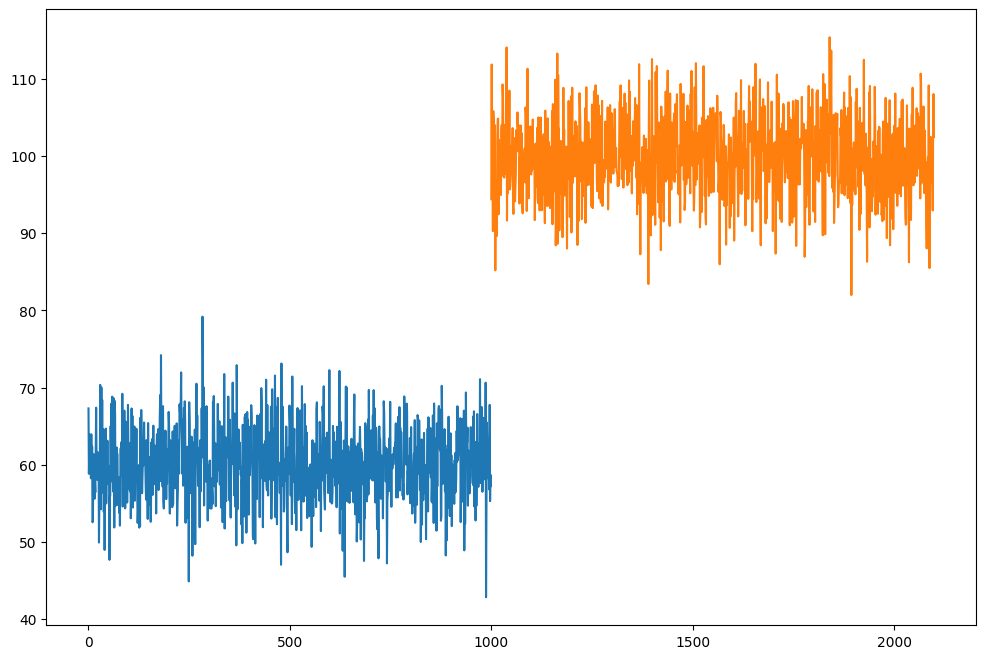

In [9]:
''' Fun dataset operations with groupby '''

''' We can get the dictionary keys for each group'''
display(hrDf.groupby('Labels').groups.keys())

''' We can also get a total count of samples in a group'''
display(len(hrDf.groupby('Labels').get_group('Stressed')))

''' Here are useful statistics'''
display(hrDf.groupby('Labels').describe()) # Ensure that the mean and std match what we put above


''' We can plot dataframes as well'''
hrDf.groupby('Labels')['Heart Rate'].plot()



In [10]:
class Classifier:
    ''' This is a class prototype for any classifier. It contains two empty methods: predict, fit'''
    def __init__(self):
        pass
    
    def predict(self, x):
        '''This method takes in x (numpy array) and returns a prediction y'''
        pass
    
    def fit(self, *data):
        '''This method is used for fitting a model to data: x, y'''
        pass

## Your turn to Code. Please fill in the .fit() method below.

In [11]:
class Priors(Classifier):
    ''' A classifier that uses only priors to determine what to output'''
    def __init__(self):
        self.class_priors = {} # Empty Dictionary that maps Class to Prior {Class1:Prior1, Class2:Prior2, ...}
        
    def predict(self, x):
        '''Always Returns the key corrsponding to the max value of the class_priors'''
        return max(self.class_priors, key=self.class_priors.get)

    
    def fit(self, dataframe, label_key = 'Labels'):
        ''' Calculates class_priors from a dataframe and stores them in self.class_priors.
            Label_Key specifies the column that contains the class labels. These should also be used
            as keys for the dictionary
        '''
        
        ''' Your code here'''
        uni = []
        freq = []
        
        for label in dataframe[label_key]:
            if label in uni:
                idx = uni.index(label)
                freq[idx] += 1
            else:
                uni.append(label)
                freq.append(1)
        
        total = len(dataframe)
        self.class_priors = {uni[i]: freq[i] / total for i in range(len(uni))}
        
        ''' Stop Coding Here'''
        
        

## Run the following code to test your results
You should get ~0.48 and ~0.52 for your priors

In [12]:
''' Create the classifier, fit to hrDf and view the priors'''
clf = Priors()
clf.fit(hrDf)
display(clf.class_priors)

{'Not Stressed': 0.47619047619047616, 'Stressed': 0.5238095238095238}

' The plot should have one straight line of just Stressed'

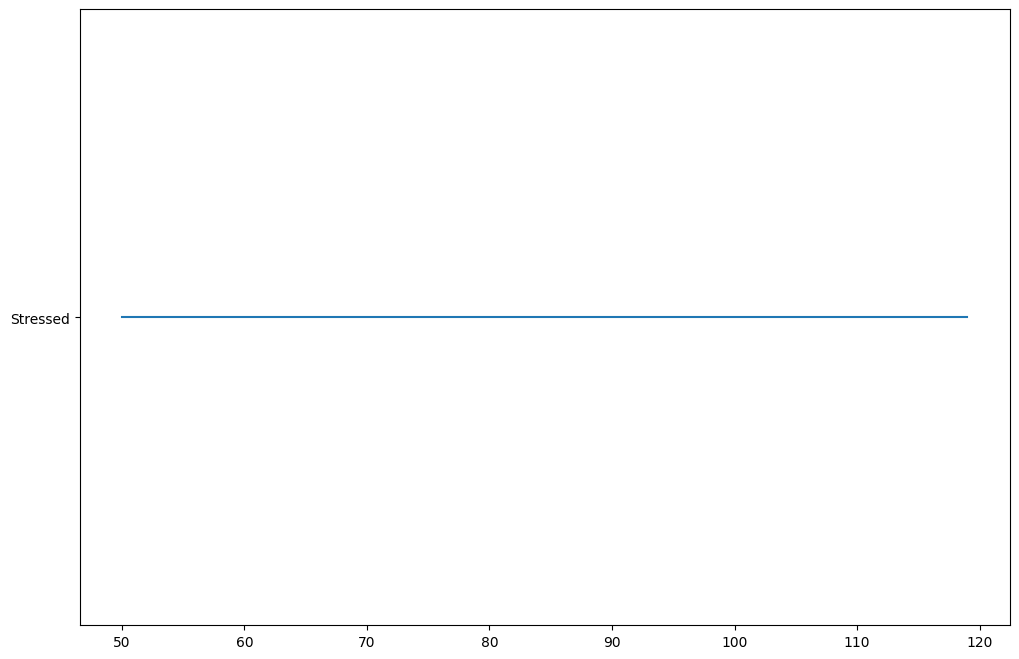

In [13]:
'''Time to plot your predictions'''
predictions = [clf.predict(x) for x in range(50, 120)]
plt.plot([n for n in range(50,120)], predictions)

''' The plot should have one straight line of just Stressed'''

# Question 2: Prior Classifier Testing

In [14]:
np.random.seed(42)
stress = np.random.normal(110, 10, 430)
Nostress = np.random.normal(65, 10, 570)
df = pd.DataFrame(np.hstack((Nostress, stress)), columns=['Heart Rate'])

li = ['Not Stressed' for x in range(570)]
li.extend(['Stressed' for x in range(430)])

df['Labels'] = li

display(df)

,Heart Rate,Labels
0,53.167415,Not Stressed
1,44.607678,Not Stressed
2,62.305932,Not Stressed
3,72.175423,Not Stressed
4,80.023571,Not Stressed
...,...,...
995,123.686316,Stressed
996,100.350765,Stressed
997,116.860515,Stressed
998,120.584245,Stressed


dict_keys(['Not Stressed', 'Stressed'])

430

Heart Rate                                               \
                  count        mean       std        min         25%   
Labels                                                                 
Not Stressed      570.0   65.095704  9.908693  38.031134   58.623482   
Stressed          430.0  110.322719  9.645487  77.587327  103.471030   

                                                  
                     50%         75%         max  
Labels                                            
Not Stressed   64.878022   71.447938   95.788808  
Stressed      110.658993  116.504656  148.527315

Labels
Not Stressed    Axes(0.125,0.11;0.775x0.77)
Stressed        Axes(0.125,0.11;0.775x0.77)
Name: Heart Rate, dtype: object

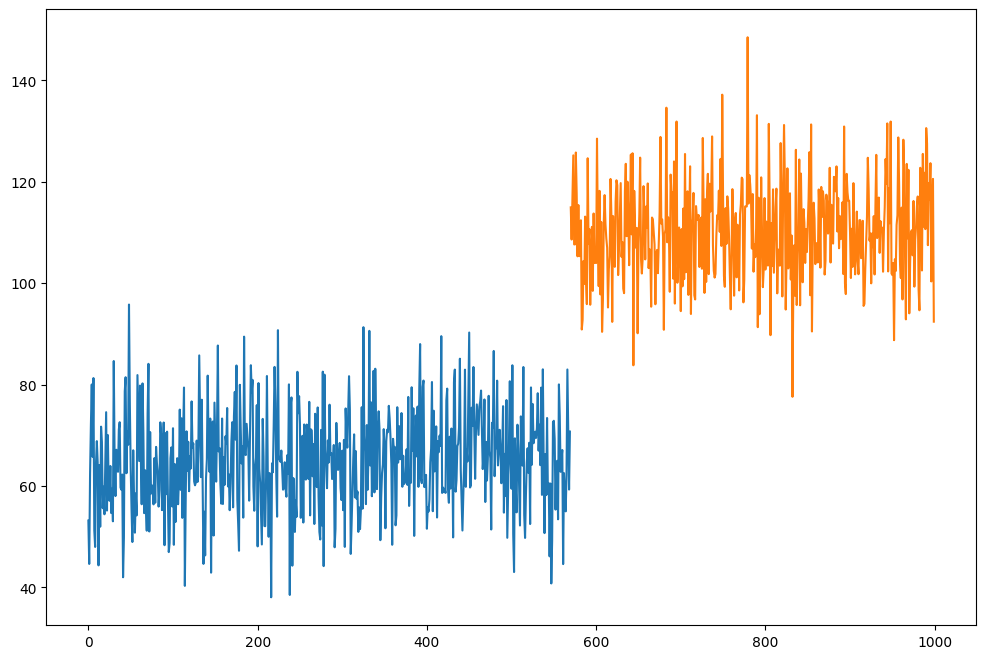

In [15]:
display(df.groupby('Labels').groups.keys())
display(len(df.groupby('Labels').get_group('Stressed')))
display(df.groupby('Labels').describe())
df.groupby('Labels')['Heart Rate'].plot()

{'Not Stressed': 0.57, 'Stressed': 0.43}

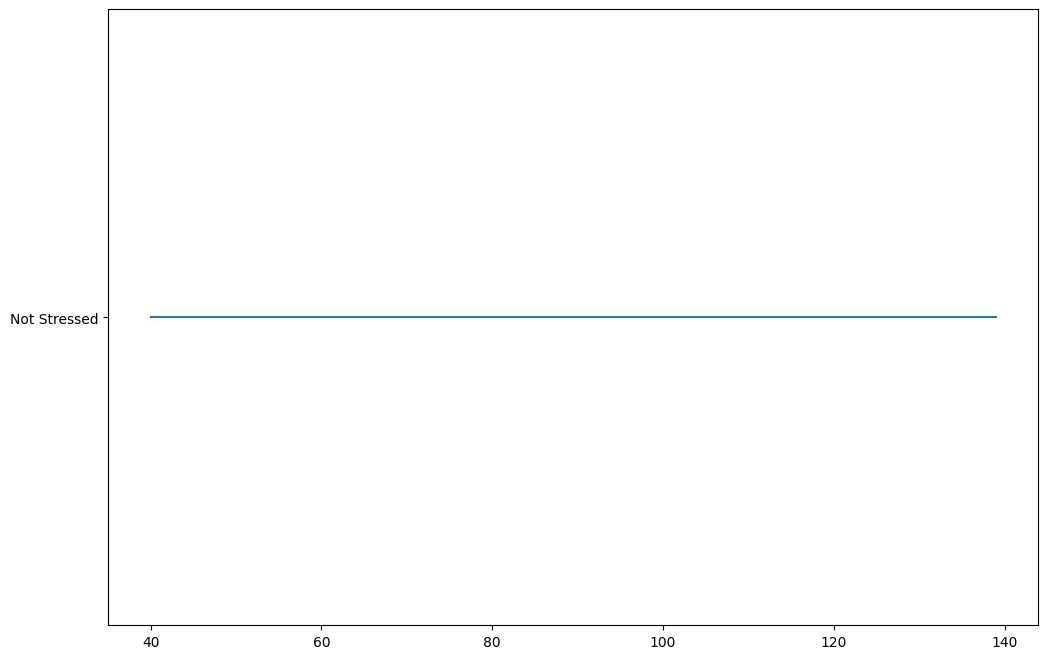

In [16]:
import classifiers

clf = classifiers.Prior()

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

clf.fit(x, y)
display(clf.model_params)

predictions = [clf.predict(x) for x in range(40, 140)]
plt.plot([n for n in range(40, 140)], predictions)

# Testing with more than two classes

2a) This proves that the function can handle more than two classes and doesn't depend on the features (x).

2b) The fewest parameters would be the number of classes.

2c) Finally, we can retrain the classifier using the same class instance as I didn't initialize the classifier for this testing and used the classifier from previous one.

In [17]:
stress = np.random.normal(110, 10, 430)
moderate = np.random.normal(85, 10, 470)
nostress = np.random.normal(65, 10, 570)

df = pd.DataFrame(np.hstack((stress, moderate, nostress)), columns=['Heart Rate'])

labels = ['Stress'] * 430 + ['Moderate'] * 470 + ['Not Stress'] * 570
df['Labels'] = labels

dict_keys(['Moderate', 'Not Stress', 'Stress'])

430

Heart Rate                                                \
                count        mean        std        min         25%   
Labels                                                                
Moderate        470.0   85.600625   9.755354  55.786495   79.175611   
Not Stress      570.0   64.988346   9.705837  34.804878   58.510848   
Stress          430.0  110.789375  10.112745  81.037446  103.748857   

                                                
                   50%         75%         max  
Labels                                          
Moderate     85.210326   92.363524  116.931076  
Not Stress   65.069315   71.642546   96.377485  
Stress      110.702399  117.313874  135.797093

Labels
Moderate      Axes(0.125,0.11;0.775x0.77)
Not Stress    Axes(0.125,0.11;0.775x0.77)
Stress        Axes(0.125,0.11;0.775x0.77)
Name: Heart Rate, dtype: object

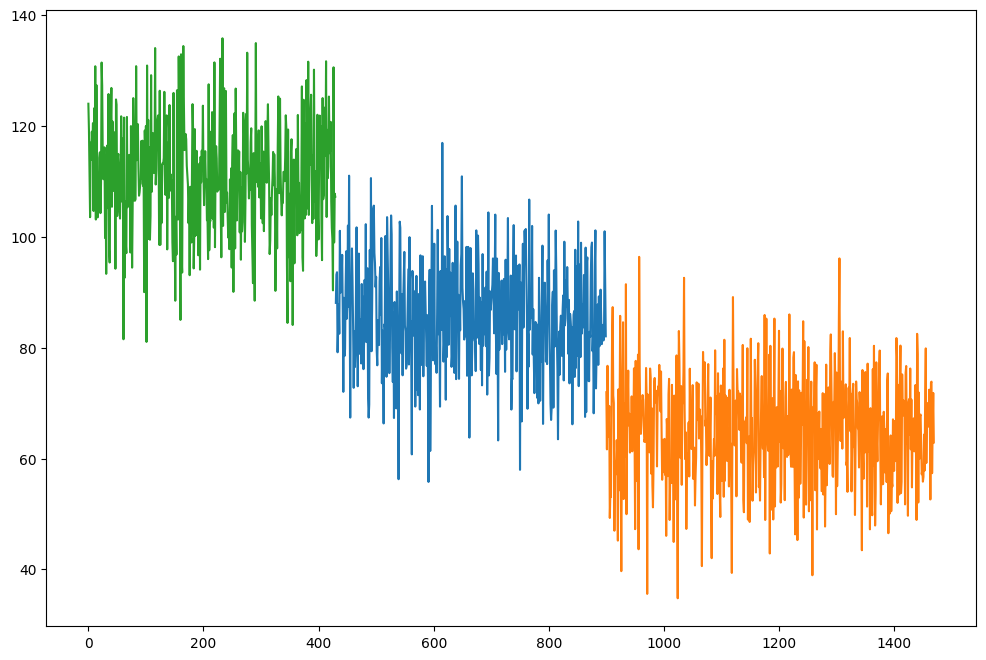

In [18]:
display(df.groupby('Labels').groups.keys())
display(len(df.groupby('Labels').get_group('Stress')))
display(df.groupby('Labels').describe())

df.groupby('Labels')['Heart Rate'].plot()

In [19]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

clf.fit(x, y)

display(clf.model_params)

{'Stress': 0.2925170068027211,
 'Moderate': 0.3197278911564626,
 'Not Stress': 0.3877551020408163}

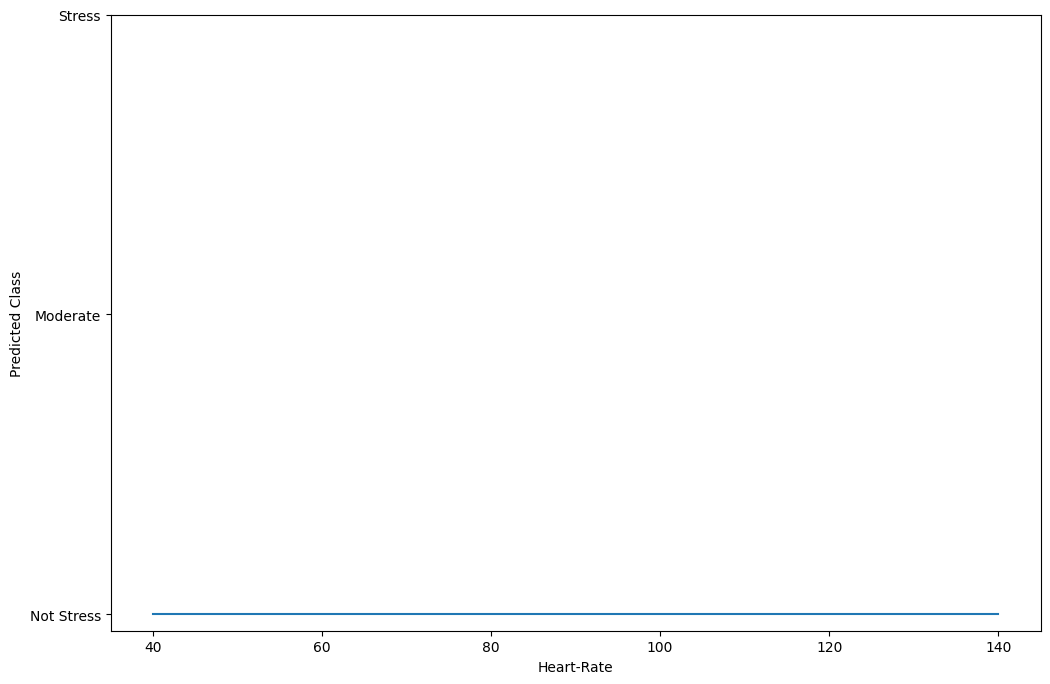

In [20]:
hrrange = np.arange(40, 141)
predictions = [clf.predict(np.array([[x]])) for x in hrrange]

plt.plot(hrrange, predictions, label="Predicted Class")
plt.xlabel('Heart-Rate')
plt.ylabel('Predicted Class')
plt.yticks([0, 1, 2], ['Not Stress', 'Moderate', 'Stress'])
plt.show()


# Question 3.1: Priors, Likelihood, Posteriors 
##### Lecture 4

In the markdown cell below, state what a prior, likelihood, and posterior probability is. I am looking for the probability formulation and quick definition. Example: If I asked to state what an evidence probability, I would expect to see P(x) and is the probability distribution of measuring a pattern with a specific value.

## Please answer below

Prior Probability $ P(w_{j}) $ - 

It means the prior knowledge or initial knowledge of how likely it is to get an individual class. It is calculated by counting the number of times a particular class label occurs out of the total labels present.

$ P(w_{j}) = \frac{\text{Number of times } w_j \text{ occurs}}{\text{Total classes}} $

Likelihood Probability $ P(x | w_{j}) $ -

It is the probability of observing the feature $ x $ (or the probability of how often we measure a pattern with the feature $ x $) given that it has a class $ w_{j} $. It has different formulas for different distributions of the data. For Gaussian Data Distribution, it uses Gaussian probability density function. If the data are independent it has the following formula,

$ P(x | w_{j}) = \prod_{i=1}^{n} P(x_{i} | w_{j}) $

Posterior Probability $ P(w_{j} | x) $ -

It is the updated probability of the class to which the object belongs given the feature $ x $. It combines the prior, likelihood as well as evidence probabilities using the Bayes Theorem.

$ P(w_{j} | x) = \frac{P(x | w_{j}) P(w_{j})}{P(x)} $

Evidence Probability $ P(x) $ -

It is the probability of observed data or feature $ x $. The evidence here is what we observe. And the probability or likelihood of this evidence occuring is the evidence probability. It acts as the normalizing constant for posterior probability.

# Question 3.2 - Explain why a prior classifier is “optimum”.

- In a prior Classifier, the model makes decisions by choosing the class with the highest prior probability.
- This is considered optimum because it represents the maximum likelihood decision based on prior knowledge especially when there is no useful information from the features.
- It also doesn't require any complex feature manipulation. It is the simplest classifier.
- If there is no data available then the prior classifier becomes the default. So it's like the baseline. This is why it is the optimum.
- If we have two classes with 0.6 and 0.4 probabilities then the prior classifier always selects the class with 0.6 probability because it is the maximum.
- This is especially useful with there is a lot of imbalanced data but not very useful when there is balanced data.

# Question 3.3 - 
#### Lecture 2
What makes a hypothesis function consistent and what is the difference between a specific and general hypothesis function?

## Please answer below

Consistent Hypothesis function- 

If a hypothesis function correctly classifies all the instances in the training dataset then it becomes consistent. It means that this hypothesis has no errors in the training dataset but it may or may not perform well on unseen data (Test data). It is also not as "strict" as the specific hypothesis but not as flexible as the General hypothesis function. The function would be something like the below,

$ h(x_{i}) = y_{i} $

where, $ x_{i} $ is the feature vector and $ y_{i} $ is the label

General Hypothesis Function (GHF) Vs Specific Hypothesis Function (SHF):

- The general hypothesis function makes broad or less restrictive predictions while the specific hypothesis function is a more constrained hypothesis that applies strict rules based on the dataset.
- The GHF covers a wide range of all possible inputs while SHF is practically tailored to the training dataset.
- GHF is usually less accurate for specific cases but it is a lot more flexible by having a range of data that it can classify.
- SHF is generally for a small subset of data in the problem space so it is highly specialized but lacks the flexibility to classify data that are outside that subset space and can potentially overfit. 